In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import pickle

In [28]:
# Load your dataset
df=pd.read_csv('New_Cancer_Final_Year_Project_Data.csv')

df.head()


,Entry,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,...,SER_N,SER_P,SER_Q,SER_R,SER_S,SER_T,SER_V,SER_W,SER_Y,Label
0,A0A096LP01,3.73,1.00,3.73,3.00,6.09,5.42,3.91,6.64,1.00,...,0.85,-1.19,0.84,0.88,2.71,2.69,-3.31,-1.12,2.75,0
1,A0A0B4J279,3.73,-0.45,3.73,1.00,4.09,1.73,2.27,6.64,0.64,...,-3.16,2.80,0.85,2.88,2.71,0.69,0.68,-3.12,-1.25,0
2,A0A0U1RQG5,9.86,2.17,3.94,7.79,-0.07,4.82,1.04,3.86,5.10,...,0.77,2.82,-1.16,-1.17,0.75,-1.28,-3.30,2.93,-1.21,0
3,A0A1B0GUW7,4.26,6.95,0.32,6.95,6.26,5.63,3.88,4.95,1.63,...,2.74,-3.14,1.00,0.86,0.68,0.74,0.55,1.00,-1.22,0
4,A0A578,9.83,-0.76,6.73,-0.14,2.10,7.02,1.95,2.34,8.64,...,2.78,-1.26,-3.30,2.74,0.69,2.72,-3.11,-1.08,2.86,0


In [29]:
min_values = df.min()  
max_values = df.max()  

print("Minimum values for each column:")
print(min_values)

print("\nMaximum values for each column:")
print(max_values)

Minimum values for each column:
Entry    A0A087X1C5
AAC_A          -3.0
AAC_C          -3.0
AAC_D          -3.0
AAC_E          -3.0
            ...    
SER_T         -3.39
SER_V         -3.49
SER_W         -3.22
SER_Y         -3.31
Label             0
Length: 73, dtype: object

Maximum values for each column:
Entry    Q9Y6Y1
AAC_A     21.88
AAC_C     31.79
AAC_D     17.29
AAC_E     20.51
          ...  
SER_T       3.0
SER_V      2.95
SER_W       3.0
SER_Y       3.0
Label         1
Length: 73, dtype: object


In [30]:
X=df.drop(['Entry','Label'],axis=1)
X



,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,SER_M,SER_N,SER_P,SER_Q,SER_R,SER_S,SER_T,SER_V,SER_W,SER_Y
0,3.73,1.00,3.73,3.00,6.09,5.42,3.91,6.64,1.00,10.27,...,0.91,0.85,-1.19,0.84,0.88,2.71,2.69,-3.31,-1.12,2.75
1,3.73,-0.45,3.73,1.00,4.09,1.73,2.27,6.64,0.64,11.91,...,-1.09,-3.16,2.80,0.85,2.88,2.71,0.69,0.68,-3.12,-1.25
2,9.86,2.17,3.94,7.79,-0.07,4.82,1.04,3.86,5.10,10.43,...,0.87,0.77,2.82,-1.16,-1.17,0.75,-1.28,-3.30,2.93,-1.21
3,4.26,6.95,0.32,6.95,6.26,5.63,3.88,4.95,1.63,19.42,...,-1.08,2.74,-3.14,1.00,0.86,0.68,0.74,0.55,1.00,-1.22
4,9.83,-0.76,6.73,-0.14,2.10,7.02,1.95,2.34,8.64,5.44,...,0.90,2.78,-1.26,-3.30,2.74,0.69,2.72,-3.11,-1.08,2.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5347,5.42,2.18,2.20,11.10,4.37,4.56,3.36,6.05,13.94,9.27,...,0.89,-1.18,-1.17,0.84,-1.22,0.66,0.84,2.76,-3.02,-1.11
5348,6.59,2.06,8.25,5.19,5.68,10.48,3.11,3.68,3.83,8.10,...,-3.12,0.83,0.83,-1.15,0.70,-3.36,-1.17,0.79,-1.07,2.83
5349,6.26,3.63,4.22,1.92,8.89,5.09,6.51,3.73,4.26,13.87,...,0.82,2.83,-1.13,-1.18,2.90,0.72,-1.25,0.67,0.88,0.78
5350,6.86,5.30,2.86,4.42,1.34,6.86,3.73,7.30,10.42,12.33,...,-1.08,-1.18,-1.29,-1.24,-1.23,0.80,-3.14,2.79,0.83,2.84


In [31]:

y=df['Label']



In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
model =  RandomForestClassifier()

[0 0 0 ... 0 0 0]


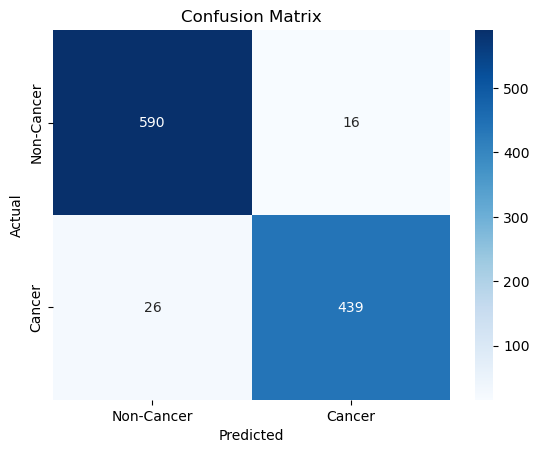

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

model.fit(X_train, y_train)
with open('new_trained_model.pkl', 'wb') as f:
    pickle.dump((model, X_train.columns.tolist()), f)
y_pred = model.predict(X_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Cancer', 'Cancer'], yticklabels=['Non-Cancer', 'Cancer'])
plt.title('Confusion Matrix')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [35]:
print(f"Random Forest Model Results:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Random Forest Model Results:
Accuracy: 0.9607843137254902
Precision: 0.9608500742954523
Recall: 0.9607843137254902
F1-Score: 0.9607316419772207
